# Import Library yang dibutuhkan

Disini, kami menggunakan model sklearn DecisionTreeClassifier untuk melakukan analisa dengan menggunakan decision tree. Serta untuk eksplorasi data menggunakan matplotlib.pyplot

In [ ]:
# Utils
import pandas as pd # Dataframe
import numpy as np
import math

# Model related
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Visualisasi
from sklearn import tree # Visualisasi Decision Tree
import matplotlib.pyplot as plt

# Upload Dataset

Dataset Rain in Australia berisi tentang pengamatan cuaca harian pada daerah - daerah di seluruh Australia yang berisi 145460.

Dataset ini memiliki variabel target yaitu RainTomorow yaitu prediksi hujan pada esok hari


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [ ]:

df = pd.read_csv("weatherAUS.csv")

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Preprocessing

Mengubah data kategorikal menjadi data numerikal dengan menggunakan cat codes.

In [ ]:
for col in df.columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes

In [ ]:
df.head(1000)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,201,172,6,13,20,13,14,10,12,66,21,161,180,181,177,0,0
1,0,141,194,0,14,20,6,15,1,11,39,24,190,187,184,202,0,0
2,0,196,200,0,15,21,13,15,9,13,33,29,160,196,222,191,0,0
3,0,159,223,0,4,9,9,0,5,4,40,15,260,237,193,224,0,0
4,0,242,266,10,13,18,1,7,3,10,77,32,192,169,190,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,0,131,66,43,14,11,13,13,7,8,92,73,286,309,87,79,1,0
1280,0,70,69,0,13,9,13,14,2,7,95,66,331,330,54,82,0,0
1281,0,65,82,2,14,5,12,8,2,2,95,46,377,395,42,81,0,0
1287,0,119,62,24,1,20,10,4,3,11,90,96,292,265,103,71,1,1


Inisiasi variable target yaitu RainTomorrow.

In [ ]:
X, y = df.drop(columns=['RainTomorrow']), df['RainTomorrow'] # Membagi data antara input (X) dan output (y)
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,396,2,213,262,6,-1,-1,13,21,13,14,11,13,71,22,215,232,8,-1,224,262,0
1,397,2,153,284,0,-1,-1,14,21,6,15,2,12,44,25,244,239,-1,-1,227,287,0
2,398,2,208,290,0,-1,-1,15,22,13,15,10,14,38,30,214,248,-1,2,265,276,0
3,399,2,171,313,0,-1,-1,4,10,9,0,6,5,45,16,314,290,-1,-1,236,309,0
4,400,2,254,356,10,-1,-1,13,19,1,7,4,11,82,33,246,221,7,8,233,341,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,3431,41,107,267,0,-1,-1,0,14,9,1,7,6,51,24,384,366,-1,-1,156,268,0
145456,3432,41,115,286,0,-1,-1,6,9,9,3,7,5,56,21,373,354,-1,-1,164,289,0
145457,3433,41,133,302,0,-1,-1,3,17,9,14,5,5,53,24,348,331,-1,-1,180,305,0
145458,3434,41,157,303,0,-1,-1,9,12,10,3,7,4,51,24,332,327,3,2,206,304,0


# UJI COBA Decision Tree

Pertama, inisialisasi variasi Decision Tree. Diantaranya kami memvariasikan test size, max depth, dan criteration.

In [ ]:
param_dt = {
    'test_size': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    'max_depth': [3, 5, 7, 11, 13, 15, 17],
    'criterion': ['entropy']
}

Inisialisasi DecisionTree menggunakan looping dengan variasi yang telah diinisialisasi sebelumnya.

In [ ]:
row_format ="{:>10}" * (len(param_dt) + 2)
print(row_format.format('t_size', 'max_depth', 'criterion', 'akurasi', 'f1'))
acc_bfr = -math.inf
for i in param_dt['test_size']:
  for j in param_dt['max_depth']:
    for k in param_dt['criterion']:
      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i, random_state=42)
      dt = DecisionTreeClassifier(random_state=42, max_depth=j, criterion=k)
      dt.fit(X_train, y_train) # fitting

      pred = dt.predict(X_test) # prediksi data testing
      acc = metrics.accuracy_score(y_test, pred) # akurasi prediksi data testing
      f1 = metrics.f1_score(y_test, pred, average='micro') # f1 prediksi data testing
      if(acc > acc_bfr):
        acc_bfr = acc
        best_param_dt = {'t_size': i, 'max_depth': j, 'criterion': k, 'accuracy': acc, 'f1': f1}
        best_dt = dt
      print(row_format.format(str(i), str(j), str(k), '%.3f' % acc, '%.3f' % f1))
print('best param: ', best_param_dt)

    t_size max_depth criterion   akurasi        f1
       0.1         3   entropy     0.806     0.806
       0.1         5   entropy     0.820     0.820
       0.1         7   entropy     0.826     0.826
       0.1        11   entropy     0.826     0.826
       0.1        13   entropy     0.823     0.823
       0.1        15   entropy     0.813     0.813
       0.1        17   entropy     0.802     0.802
       0.2         3   entropy     0.806     0.806
       0.2         5   entropy     0.817     0.817
       0.2         7   entropy     0.822     0.822
       0.2        11   entropy     0.826     0.826
       0.2        13   entropy     0.820     0.820
       0.2        15   entropy     0.813     0.813
       0.2        17   entropy     0.799     0.799
       0.3         3   entropy     0.816     0.816
       0.3         5   entropy     0.820     0.820
       0.3         7   entropy     0.826     0.826
       0.3        11   entropy     0.829     0.829
       0.3        13   entropy 

# Visualisasi DecisionTree

Visualisasi Pohon Tree DecisionTree. Di pohon tersebut didapatkan root nya yaitu Humidity3PM yang mana fitur itulah yang memiliki entropy yang terbesar. 

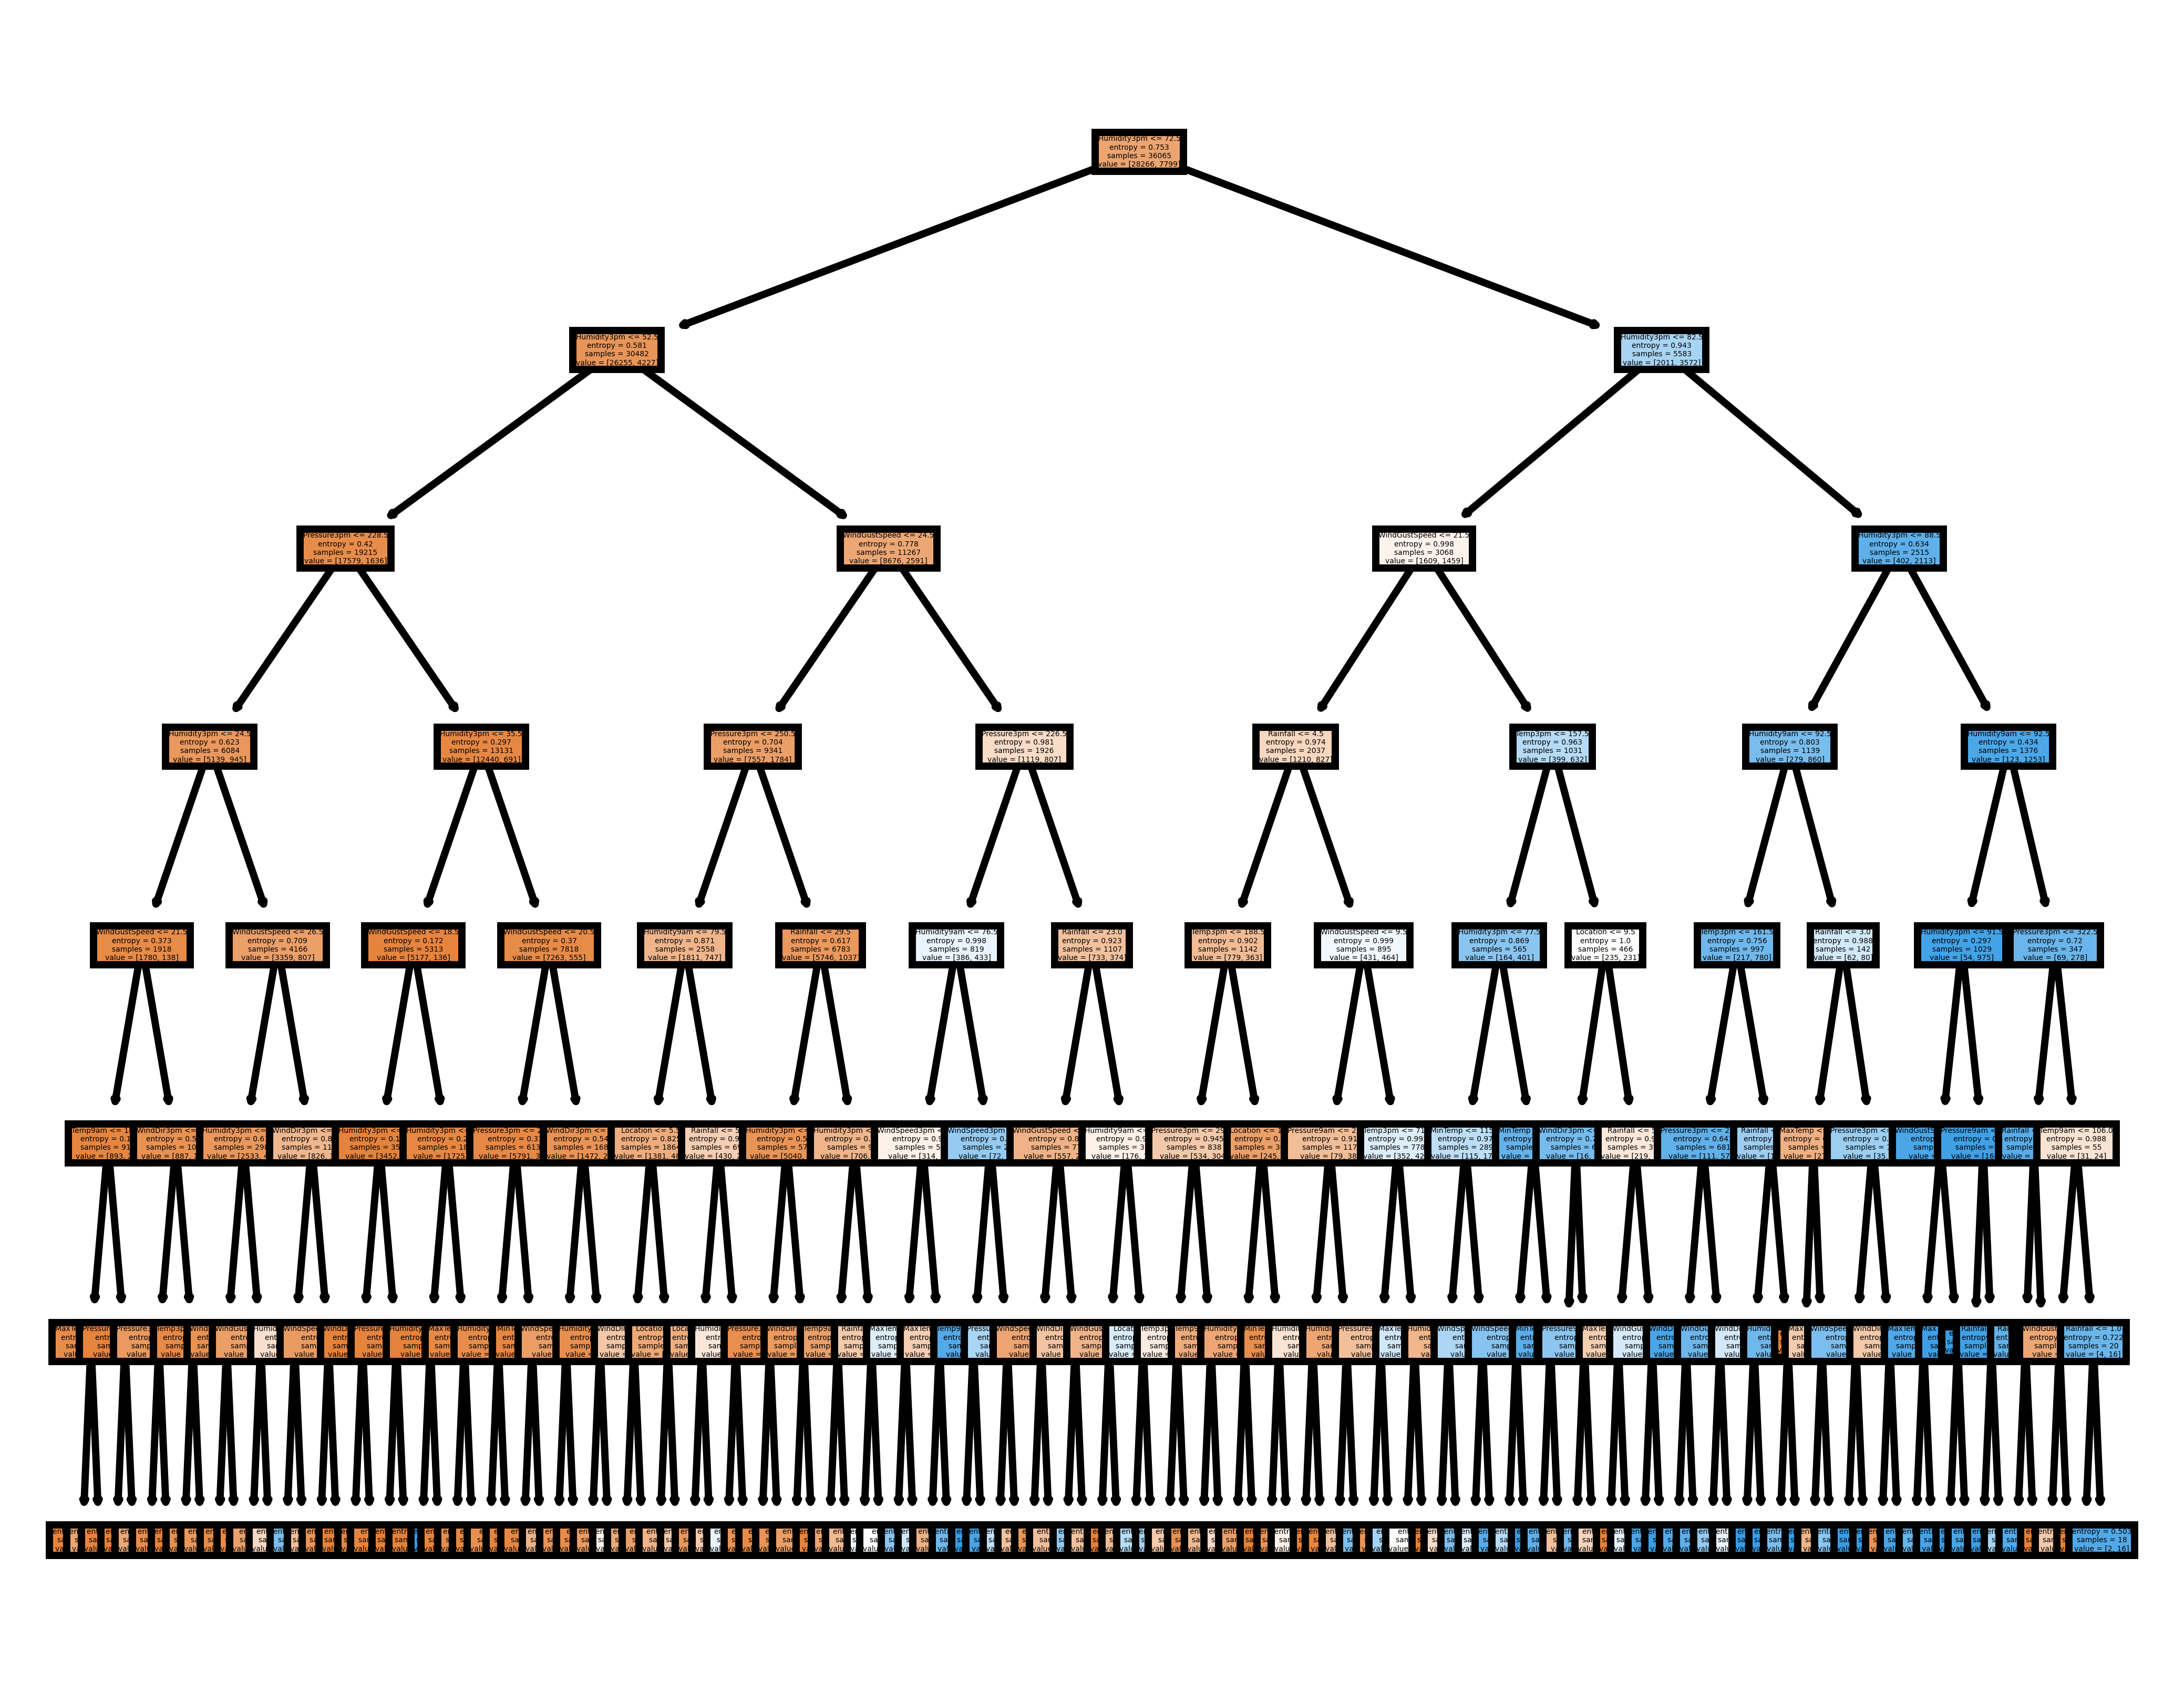

In [ ]:
fig = plt.figure(figsize=(5,4),dpi=1000)
_ = tree.plot_tree(best_dt, 
                   feature_names=df.drop(columns=['RainTomorrow']).columns,  
                   filled=True)

# KESIMPULAN

Variasi parameter yang didapatkan adalah data dengan data size 30%, menggunakan maxdepth = 11, dengan menggunakan nilai entropy didapatkan akurasi = 0.8288647509051744